<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Fernanda Amador, Frida Hernandez

**Fecha:** 12 de Octubre 2021.

**Expediente** : 725573, 720476.
 
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/feramdor/Tarea6_Amador_Hernandez
# Tarea 6: Clase 10

Partiendo que se desea generar variables aleatorias para la siguiente función de densidad
$$f(x)=30(x^2-2x^3+x^4)$$
Responda los siguientes literales:
1. Usar como función que mayora a $f(x)$ a $t(x)=a \sin(\pi x)$ donde a es el máximo de la función $f(x)$ y graficarlas en una misma gráfica, para validar que en realidad si cumple la condición $t(x)\geq f(x)$.
2. Encontrar la función de densidad $g(x)$ según lo visto en clase. Reportar todos los cálculos realizados para encontrar dicha función usando Markdown (Latex).
3. Usar la función encontrada en el punto 2 y utilizar el método de la transformada inversa visto en la clase 9, para generar variables aleatorias que sigan la distribución $g(x)$. **Nota:** Recuerde que el método de la transformada inversa funciona con la distribución de probabilidad acumulada y no con su densidad. Nuevamente similar al punto anterior reportar todos los cálculos usando Markdown (Latex). 
4. Según el punto 3, generar 10000 puntos aleatorios que sigan la distribución $g(x)$ y comparar con su histograma para validar que los puntos generados siguen la distribución deseada. El resultado debe ser como sigue:
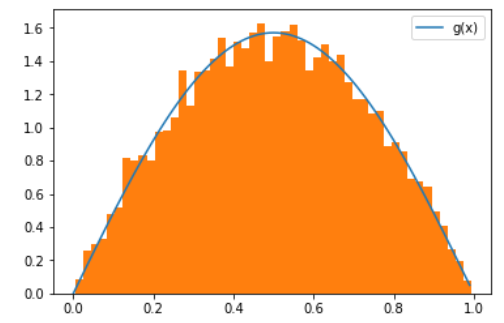

5. Genere 500 puntos aleatorios usando el método de aceptación y rechazo y las funciones $f(x)$ y $t(x)$ para validar que todos los cálculos anteriores están correctamente realizados. El resultado debe de ser como sigue:
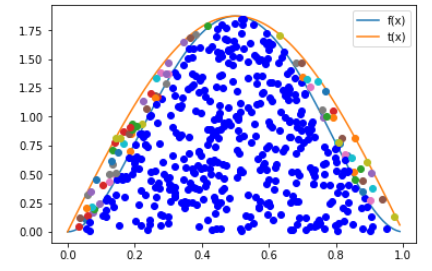

6. Comparar el porcentaje de puntos de aceptación cuando se usa $t(x)$ constante y $t(x)$ un pulso senoidal. Concluir

7. Genere una variable aleatoria $X$ a partir de la siguiente PDF
$$f(x)=20x(1-x)^3$$ 
usando el método de aceptación y rechazo

8. Demostrar la validez de la siguiente ecuación
$$p_{i+1}=\frac{n-i}{i+1}\frac{p}{1-p} p_i$$

9. Seguir un procedimiento similar al mostrado cuando se generó una distribución binomial, pero en esta caso genere un código que genere variables aletorias Poisson cuya función de distribución de probabilidad esta dada por:
$$P(k,\lambda)=\frac{e^{-\lambda}(\lambda)^k}{k!}$$
    

Demuestre matemáticamente que 
 $$P(k+1)=\frac{\lambda}{k+1}P(k)$$
 y a partir de esta relación genere variables aletorias que distribuyen poisson usando el método de la transformada inversa.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import pandas as pd

#### Código de solución `Estudiante 2: Frida Hernández`

### Inciso 1

La función t(x) si es mayor a la función f(x)


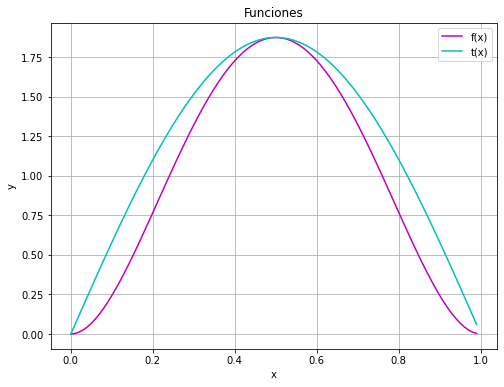

In [3]:
#Función f(x)
fx=lambda x: 30*(x**2-2*x**3+x**4)

#Máximo a de la función
a=fx(optimize.fmin(lambda x:-fx(x), 0, disp=False))

#Función t(x)
tx=lambda x: a*np.sin(np.pi*x)

#Validación por gráfica 
x=np.arange(0,1,0.01)
plt.figure(figsize=[8,6])
plt.title('Funciones')
plt.ylabel('y')
plt.xlabel('x')
plt.plot(x,fx(x),'-m',label='f(x)')
plt.plot(x,tx(x),'-c',label='t(x)')
plt.grid()
plt.legend()
print('La función t(x) si es mayor a la función f(x)')

### Inciso 2

#### Visto en clase
$$t(x)=a\sin(\pi x)$$

$$c=\int_{-\infty}^{\infty} t(x) dx$$

$$g(x)=\frac{t(x)}{c}$$

#### Integrar ${t(x)}$ dentro del dominio de la función [0,1] , c es igual a:
$$c=\int_{0}^{1} a\sin(\pi x) dx$$

#### Evaluar limites:
$$c=\frac{-a\cos(\pi)}{\pi} - \frac{-a\cos(0)}{\pi}$$

$$c=\frac{2a}{\pi}$$

#### g(x) es igual a:
$$g(x)=\frac{a\sin(\pi x)}{\frac{2a}{\pi}}$$

#### Simplificar:
$$g(x) = \frac{\pi\sin(\pi x)}{2}$$

#### Obtener G(x):
$$\int_{0}^{x} g(x) dx$$

#### Evaluan los limites:
$$G(x)=\frac{-\cos(\pi x)}{2} - \frac{-\cos(0)}{2}$$

$$G(x)=\frac{-\cos(\pi x)}{2} + \frac{1}{2}$$

$$G(x)=\frac{1}{2}(-\cos(\pi x)+1)$$

$$G(x)=-\frac{1}{2}(\cos(\pi x)-1)$$

### Inciso 3

#### Obtener la inversa:
$$G(x)=U$$

$$-\frac{1}{2}(\cos(\pi x)-1)=U$$

$$\cos(\pi x)-1=-2U$$

$$\cos(\pi x)=-2U+1$$

$$\pi x=\cos^{-1}(-2u+1)$$

$$x=\frac{\cos^{-1}(-2u+1)}{\pi}$$

#### Comprobar por derivada de G(x) que es g(x):
$$\frac{dG(x)}{dx}=\frac{\pi\sin(\pi x)}{2}$$

In [4]:
#Programar la función
Gx = lambda x: (np.arccos(-2*x+1))/np.pi

#Derivada
gx= lambda x: (np.pi*np.sin(np.pi*x))/2

### Inciso 4

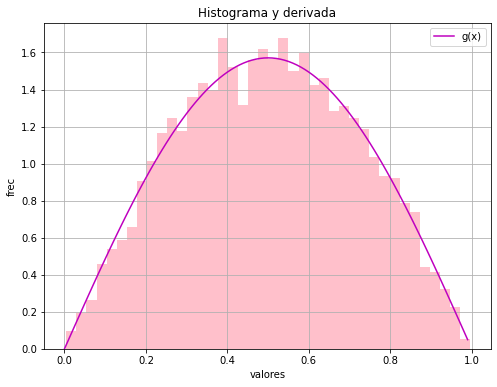

In [5]:
# 10,000 puntos aleatorios distribución g(x)
N=10000
U=np.random.rand(N)
ui=list(map(lambda u: Gx(u),U))
x=np.arange(0,1,0.01)
y=gx(x)
plt.figure(figsize=[8,6])
plt.title('Histograma y derivada')
plt.xlabel('valores')
plt.ylabel('frec')
plt.hist(ui,density=True,bins=40,color='pink')
plt.plot(x,y,'-m',label='g(x)')
plt.legend()
plt.grid()

### Inciso 5

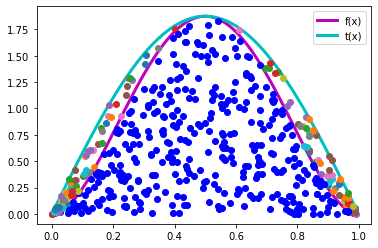

In [6]:
# Función de aceptación y rechazo usando compresión de listas (Vista en clase)
def Acep_rechazo(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
    f_x = f(R1)
    t_x = t(R1)
    condition = R2*t_x <=f_x
    [plt.plot(R1[i],R2[i]*t_x[i],'ob') if condition[i] else plt.plot(R1[i],R2[i]*t_x[i],'o') \
         for i in range(len(R1))]      
    plt.show()

N=500
R2=np.random.rand(N) 
R1=np.random.uniform(0,1,size=N)

plt.plot(x,fx(x),'-m',lw=3,label='f(x)')
plt.plot(x,tx(x),'-c',lw=3,label='t(x)')
plt.legend()
Acep_rechazo(R2,R1,fx,tx)

### Inciso 6

El porcentaje de puntos aceptado cuando t(x) es una constante es: 55.800000000000004 %. Y cuando es un pulso senoidal es: 72.8 %.


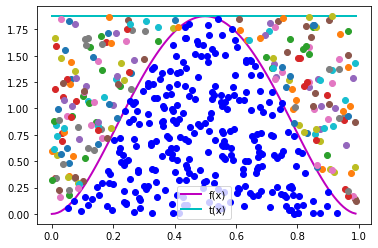

In [7]:
# Función de aceptación y rechazo (Vista en clase)
def Acep_rechazo_aleatorios(
    R2:'Variables distruidas U~U(0,1)',
    R1:'Variables distribuidas como g(x)',
    f:'función objetivo a generar',
    t:'función que mayora a f'):

    f_x = f(R1)
    t_x = t(R1)
    condition = R2*t_x <=f_x
    x=[R1[i] for i in range(len(R1))if condition[i]]
    return x

#Porcentage de puntos aceptados cuando t(x) sinoidal
senoidal=Acep_rechazo_aleatorios(R2,R1,fx,tx)
per=len(senoidal)/N

#Porcentage de puntos aceptados cuando t(x) constante
tx2 = lambda x: a*np.ones(len(x))
cons = Acep_rechazo_aleatorios(R2,R1,fx,tx2)
per2 = len(cons)/N

print('El porcentaje de puntos aceptado cuando t(x) es una constante es:',per2*100,'%. Y cuando es un pulso senoidal es:',per*100,'%.')

#Apoyo visual
plt.plot(x,fx(x),'-m',lw=2,label='f(x)')
plt.plot(x,tx2(x),'-c',lw=2,label='t(x)')
plt.legend()
Acep_rechazo(R2,R1,fx,tx2)

* Conclusión

Con una función constante se aceptan menos puntos que con una función que se aproxime más a la función dada.

### Inciso 7

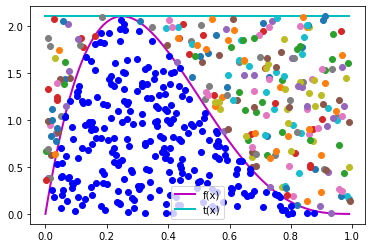

In [8]:
#Definir mi función
f=lambda x: 20*x*(1-x)**3

#Definir t(x)=Cte
c=f(optimize.fmin(lambda x:-f(x), 0, disp=False))
t=lambda x: c*np.ones(len(x))

#Graficar
plt.plot(x,f(x),'-m',lw=2,label='f(x)')
plt.plot(x,t(x),'-c',lw=2,label='t(x)')
plt.legend()
Acep_rechazo(R2,R1,f,t)

In [9]:
#Variable aleatoria
va=Acep_rechazo_aleatorios(R2,R1,f,t)
va

[0.19093955395869167,
 0.34035368147724776,
 0.5615730471383713,
 0.10271004774693548,
 0.5553032728142658,
 0.3578358384121574,
 0.5329098327619253,
 0.3244921180712316,
 0.21248813847401193,
 0.5428777425268801,
 0.6713676352268995,
 0.07147925912492992,
 0.37098112777131165,
 0.622146298161377,
 0.3619845630233045,
 0.3063700717899993,
 0.17683730191775615,
 0.875533168301316,
 0.2854261513264953,
 0.3918975842215223,
 0.39058476050922697,
 0.2509352108681656,
 0.3298516635089719,
 0.4814397561286624,
 0.11867187089440567,
 0.4466719552259808,
 0.2355282980600769,
 0.7812442496715613,
 0.7180153618482313,
 0.4420080205519298,
 0.8025296614351763,
 0.5845718871245823,
 0.10262108485816801,
 0.0276449794253788,
 0.07430423604807024,
 0.43902344686523653,
 0.3267223877568761,
 0.23813338395340078,
 0.3014109595190486,
 0.5189425003908299,
 0.20015626944471554,
 0.6291083420449239,
 0.6064304145511508,
 0.16129576360696518,
 0.5549459822989671,
 0.20773186521732867,
 0.05561281853188082

### Inciso 8

* Distribución Binomial con número de éxitos $n$ y probabilidad $p$ de éxito:  
$$X\sim binomial(n,p) \longrightarrow p_i=P(X=i)=\frac{n!}{i!(n-i)!}p^i(1-p)^{n-i},\quad i=0,1,\cdots,n$$  


$$p_{i+1}=\frac{n!}{(i+1)!(n-(i+1))!}p^{i+1}(1-p)^{n-(i+1)}$$

$$p_{i+1}=\frac{n!(n-i)}{(i+1)i!(n-i)!}p^{i}p(1-p)^{n-i}(1-p)^{-1}$$

$$P_i+1 = \frac{(n-i)p}{(i+1)(1-p)}p_i$$
    


### Inciso 9

* Se nos dice que:
$$P(k)=\frac{e^{-\lambda}(\lambda)^k}{k!}$$

* Entonces:
$$P(k+1)=\frac{e^{-\lambda}(\lambda)^{k+1}}{(k+1)!}$$
    
$$P(k+1)=\frac{e^{-\lambda}(\lambda)^{k}\lambda}{(k+1)k!}$$

* Se obtiene:
$$P(k+1)=\frac{\lambda}{k+1}P(k)$$

In [20]:
#Generar variables aletorias que distribuyen poisson usando el método de la transformada inversa
def poisson(l,k):
    p=np.zeros(k + 1)
    p[0]=np.exp(-l)
    def fill(i):
        nonlocal p
        p[i+1]=(l/(i+1))*p[i]
    [fill(i) for i in range(k)]
    return np.cumsum(p)

#Función vista en clase
def Gen_distr_discreta(p_acum: 'P.Acumulada de la distribución a generar',
                       indices: 'valores reales a generar aleatoriamente',
                       N: 'cantidad de números aleatorios a generar'):
    U =np.random.rand(N)
    rand2reales = {i: idx for i, idx in enumerate(indices)}
    y = pd.Series([sum([1 for p in p_acum if p < ui]) for ui in U]).map(rand2reales)
    return y

#Función vista en clase
def plot_histogram_discrete(distribucion:'señal de varibles aleatorias de un distribución DISCRETA dada',
                            label:'label del legend a aparecer en el gráfica',
                            densidad:'por defecto regresa el histograma en densidad'=True):
    plt.figure(figsize=[10,4])
    y, x = np.histogram(distribucion, bins=len(set(distribucion)), density=densidad) 
    plt.bar(x[1:], y, label=label)
    plt.legend()
    plt.show()

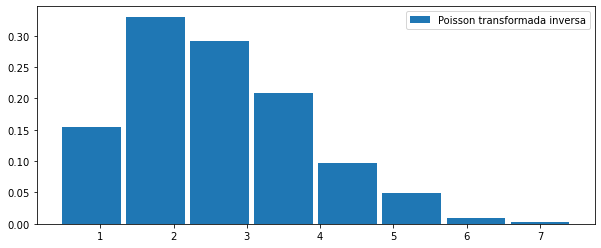

In [21]:
pacum=poisson(2,100)
k=10
dist_poisson = Gen_distr_discreta(pacum,np.arange(0,k+1),1000)

#Graficar histograma
plot_histogram_discrete(dist_poisson,'Poisson transformada inversa')

#### Código de solución `Estudiante 1: Fernanda Amador`

In [2]:
### Inciso 7# Función
p = 1.90
f = lambda x: 30 * (x ** 2 - 2 * x ** 3 + x ** 4)
t = lambda x: p * np.sin(np.pi * x)

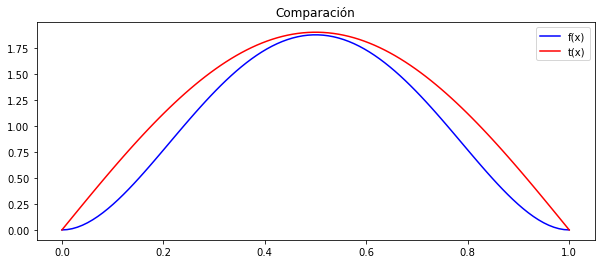

In [3]:
# Graficamos 
x = np.linspace(0, 1, 100)
plt.figure(figsize = [10,4])
plt.plot(x, f(x), label = 'f(x)', color = 'b')
plt.plot(x, t(x),label = 't(x)', color  = 'r')
plt.title('Comparación')
plt.legend()
plt.show()

### Inciso 2

Sabemos que $t(x)= a\sin(\pi x)$ entonces:
  
$$c = \int_{-\infty}^{\infty}t(x)=a\int_{-\infty}^{\infty}\sin(\pi x) dx$$
  
como $f(x)$ es una función de densidad de probabilidad solamente para el rango $0 \leq x \leq 1$ entonces queda de la siguiente manera:
  
$$c =a\int_{0}^{1}\sin(\pi x) dx = \frac{\pi}{2a}$$
  
por lo tanto $g(x)$ queda de la siguiente manera:
$$g(x)=\frac{t(x)}{c}=\frac{a\sin(\pi x)}{\frac{\pi}{2a}}=\frac{\pi sin(\pi x)}{2}$$
  
Podemos comprobar que $g(x)$ es una densidad dado que:

$$\frac{\pi}{2} \int_{0}^{1}\sin(\pi x) dx = 1$$

### Inciso 3

Sabiendo que $g(x)$ es función de distribución entonces $G(x)$ es la función de distribución acumulada:

$$G(x)= \int_{0}^{x} \frac{\pi}{2}\sin(\pi x) dx = \frac{-\cos(\pi x)+1}{2}$$

Teniendo ya la función de distribución acumulada entonces usamos el método de la transformada inversa:

$$G(x)=\frac{-\cos(\pi x)+1}{2} = U$$
$$-\cos(\pi x)+1 = 2U$$
$$-\cos(\pi x) = 2U-1$$
$$cos(\pi x) = -2U+1$$
$$\pi x = \cos^{-1}(-2U+1)$$
$$ x = \frac{\cos^{-1}(1-2U)}{\pi}$$

En el rango de $ 0 \leq U \leq 1$

### Inciso 4

In [4]:
# Definimos funciones 
def f_trans(N):
    return (np.arccos(-2*np.random.rand(N)+1))/np.pi

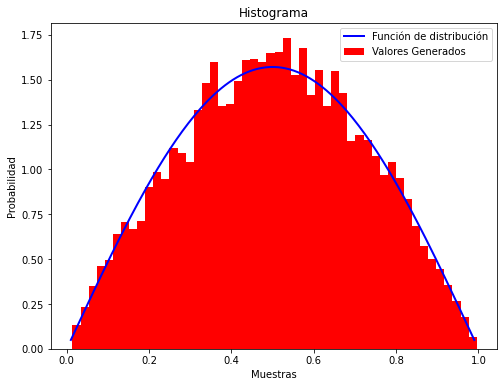

In [5]:
# Información para el problema
N = 10000
comp = f_trans(N)

# Gráfica del histograma y de la función
plt.figure(figsize = (8,6))
plt.hist(comp, bins = 50, color = 'red', density = True, label = 'Valores Generados')
x = np.linspace(0.01,0.99,200)
y = lambda x: (np.pi/2) * np.sin(np.pi*x)
plt.plot(x, y(x),'b',lw = 2,  label = 'Función de distribución')
plt.title('Histograma')
plt.ylabel('Probabilidad')
plt.xlabel('Muestras')
plt.legend()
plt.show()

### Inciso 5

In [6]:
# Creación de función 
def m_acep_rech(R2, R1, f, t):
    
    fx = f(R1)
    tx = t(R1)
    cond = R2 * tx <= fx
    
    [plt.plot(R1[i], R2[i] * tx[i],'ob') if cond[i] else plt.plot(R1[i], R2[i] * tx[i],'o') \
         for i in range(len(R1))]
                
    plt.show()
    
    x = [R1[i] for i in range(len(R1)) if cond[i]]
    return x

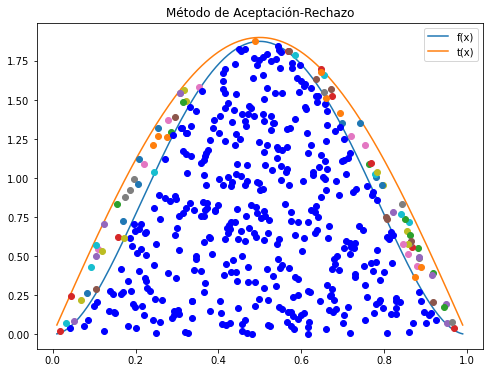

In [7]:
# Información
N = 500
R2 = np.random.rand(N)
R1 = f_trans(N)

#Gráfica
plt.figure(figsize= (8,6))
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.title('Método de Aceptación-Rechazo')
plt.legend()
a = m_acep_rech(R2, R1, f, t)
plt.show()

### Inciso 6

In [9]:
# Comparación 
f_max = f(optimize.fmin(lambda x: -f(x), 0, disp = False))
t_c = lambda x: f_max * np.ones([len(x)])
R1 = np.random.rand(N)
R2 = np.random.rand(N)

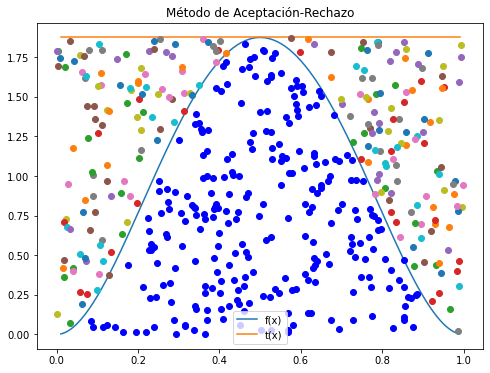

In [10]:
plt.figure(figsize = (8,6))
plt.plot(x, f(x),label = 'f(x)')
plt.plot(x, t_c(x),label ='t(x)')
plt.legend()
plt.title('Método de Aceptación-Rechazo')
ac = m_acep_rech(R2, R1, f, t_c)
plt.show()

In [11]:
# Porcentuajes
p_a = len(a) / N
p_ac = len(ac) / N
p_a, p_ac

(0.82, 0.52)

Podemos llegar a la conclusión de que se tiene un menor porcentaje de rechazo para la función senoidal con una constante de t, lo que puede hacer que sea un método más eficiente. 

### Inciso 7

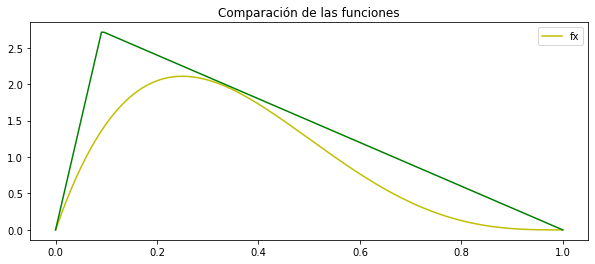

In [13]:
# Nueva función 
f_2 = lambda x: 20 * x *(1 - x) ** 3
t_2 = lambda x: 30 * x if x < (1/11) else (3 * (1 - x))

x = np.linspace(0,1,200)
y = list(map(lambda x: t_2(x),x))
plt.figure(figsize=[10,4])
plt.plot(x,f_2(x), label = 'fx', color = 'y')
plt.plot(x,y, color = 'g')
plt.title('Comparación de las funciones')
plt.legend()
plt.show()

In [19]:
# Nueva función método de aceptación y rechazo 
def m_acep_rech2(R2, R1, f, t):
    
    f_x = f(R1)
    t_x = np.array(list(map(lambda x: t(x),R1)))
    cond = R2*t_x <=f_x
    [plt.plot(R1[i],R2[i]*t_x[i],'ob') if cond[i] else plt.plot(R1[i],R2[i]*t_x[i],'o') \
         for i in range(len(R1))]
                
    plt.show()
    
    x = [R1[i] for i in range(len(R1)) if cond[i]]
    return x

In [22]:
# Se obtiene G(x) función de distribución para los cálculos del método 
g_inv = lambda u: np.sqrt(u/11) if u < 1/11 else 1 - (5/11)*np.sqrt((22-22*u)/5)

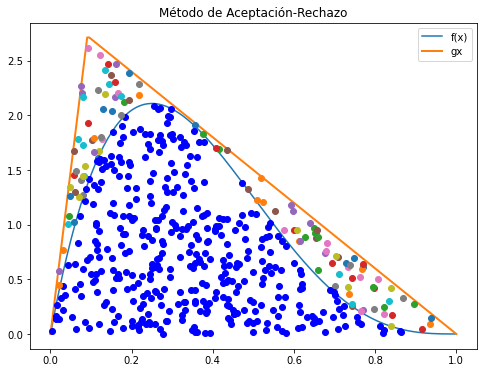

In [21]:
N = 500
R2 = np.random.rand(N)
R1 = np.array(list(map(lambda x: g_inv(x),np.random.rand(N))))

#Gráfica del método junto con las funciones
plt.figure(figsize= (8,6))
plt.plot(x,f_2(x),label='f(x)')
y = list(map(lambda x: t_2(x),x))
plt.plot(x, y, lw = 2,  label = 'gx')
plt.title('Método de Aceptación-Rechazo')
plt.legend()
aprob = m_acep_rech2(R2, R1, f_2, t_2)

plt.show()

### Demostaciones 

### Inciso 8

Si consideramos que la distribución binomial distribuye de la siguiente forma:
    
$$X\sim binomial(n,p) \longrightarrow p_i=P(X=i)=\frac{n!}{i!(n-i)!}p^i(1-p)^{n-i},\quad i=0,1,\cdots,n$$    
$p_{i+1}=\frac{n!}{(i+1)!(n-(i+1))!}p^{i+1}(1-p)^{n-(i+1)} $

Acomodando lo anterior un poco nos queda:
    
$p_{i+1}=\frac{n!(n-i)}{(i+1)i!(n-i)!}p^{i}p(1-p)^{n-i}(1-p)^{-1}$
    
Para obtener como resultado:

$p_{i+1}=\frac{n-i}{i+1}\frac{p}{1-p} p_i$
    


### Inciso 9

Dado que:

$P(k)=\frac{e^{-\lambda}(\lambda)^k}{k!}$

Obtenemos:

$P(k+1)=\frac{e^{-\lambda}(\lambda)^{k+1}}{(k+1)!}$
    
$P(k+1)=\frac{e^{-\lambda}(\lambda)^{k}\lambda}{(k+1)k!}$

Y separando:

$P(k+1)=\frac{\lambda}{k+1}P(k)$

In [32]:
# Funciones para variables aleatorias Poisson usando el método de la transformada inversa

def Gen_distr_discreta(p_acum, indices,N):
    
    U = np.random.rand(N)
    rand2reales = {i: idx for i, idx in enumerate(indices)}
    y = pd.Series([sum([1 for p in p_acum if p < ui]) for ui in U]).map(rand2reales)

    return y

# Función histograma
def plot_histogram_discrete(distribucion, label, densidad = True):

    plt.figure(figsize = [10,4])
    y, x = np.histogram(distribucion, bins = len(set(distribucion)), density = densidad) 
    plt.bar(x[1:], y, label = label)
    plt.legend()
    plt.show()
    
# Función Poisson    
def p_acum_poisson(lamb, p_k):
    pr = np.zeros(p_k + 1)
    pr[0] = np.exp(-lamb)
    def Pr(i):
        nonlocal pr
        pr[i + 1] = (lamb /(i + 1)) * pr[i]
    [Pr(i) for i in range(p_k)]
    return np.cumsum(pr)

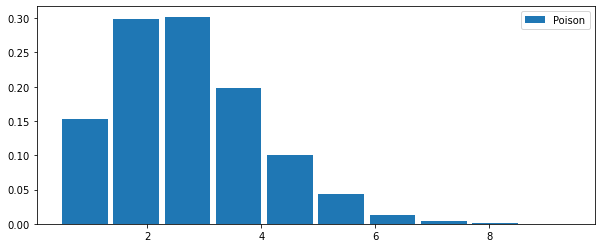

In [44]:
# Simulamos 
a = p_acum_poisson(2, 100)
p_k = 10
N = 10000
c = Gen_distr_discreta(a, np.arange(0, p_k + 1), N)
plot_histogram_discrete(c, 'Poison')